In [179]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import mnist

In [180]:
train_image = mnist.train_images()
train_labels = mnist.train_labels()
test_image = mnist.test_images()
test_labels = mnist.test_labels()

In [168]:
train_img = mnist.train_images()
train_lbl = mnist.train_labels()
test_img = mnist.test_images()
test_lbl = mnist.test_labels()

In [169]:
print(train_img.shape)

(60000, 28, 28)


In [170]:
train_img=train_img.reshape((-1,784))

In [171]:
train_img.shape

(60000, 784)

In [181]:
test_img=test_img.reshape((-1,784))

In [182]:
test_img.shape

(10000, 784)

In [183]:
print(test_lbl.shape)

(10000,)


### data preprocessing

In [184]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [185]:
pca=PCA(.95)

In [186]:
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [187]:
pca.n_components_

331

In [188]:
train_img=pca.transform(train_img)
test_img=pca.transform(test_img)


In [189]:
train_img.shape

(60000, 331)

In [190]:
from sklearn.linear_model import LogisticRegression

In [191]:
LogisticRegr=LogisticRegression(solver='lbfgs')

In [193]:
LogisticRegr.fit(train_img,train_lbl)

C:\Users\NOEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\NOEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\NOEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\NOEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\NOEL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iteratio

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [194]:
test_img[0].shape

(331,)

In [195]:
test_img[0].reshape(1,-1).shape

(1, 331)

In [197]:
# Returns a NumPy Array
# Predict for One Observation (image)
LogisticRegr.predict(test_img[0].reshape(1,-1))

array([7], dtype=uint8)

In [198]:
train_image[11].shape

(28, 28)

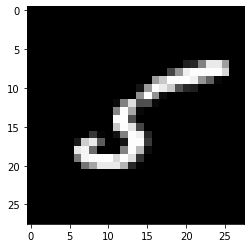

In [199]:
%matplotlib inline
import matplotlib.pyplot as plt
first_image = train_image[11]
plt.imshow(first_image, cmap='gray')
plt.show()

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [138]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [139]:
#loading data in to panda DataFrame
df=pd.read_csv(url,names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target' ])

In [140]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [141]:
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
target           object
dtype: object

In [142]:
df.shape

(150, 5)

In [143]:
features=['sepal length', 'sepal width', 'petal width']
x=df.loc[:,features].values

In [144]:
y=df.loc[:, ['target']].values

In [145]:
x=StandardScaler().fit_transform(x)

In [146]:
pd.DataFrame(data=x,columns=features).head()

,sepal length,sepal width,petal width
0,-0.900681,1.032057,-1.312977
1,-1.143017,-0.124958,-1.312977
2,-1.385353,0.337848,-1.312977
3,-1.506521,0.106445,-1.312977
4,-1.021849,1.263460,-1.312977


In [147]:
pca=PCA(n_components=2)

In [148]:
principalComponents=pca.fit_transform(x)

In [149]:
principalDF=pd.DataFrame(data=principalComponents,
                        columns=['principal component 1','principal component 2'])

In [150]:
principalDF.head()

,principal component 1,principal component 2
0,-1.830569,0.482480
1,-1.595673,-0.672624
2,-1.907258,-0.343319
3,-1.906913,-0.602783
4,-1.986362,0.647132


In [151]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [152]:
finalDF=pd.concat([principalDF,df['target']],axis=1)
finalDF.head(5)

,principal component 1,principal component 2,target
0,-1.830569,0.482480,Iris-setosa
1,-1.595673,-0.672624,Iris-setosa
2,-1.907258,-0.343319,Iris-setosa
3,-1.906913,-0.602783,Iris-setosa
4,-1.986362,0.647132,Iris-setosa


In [153]:
target = 'Iris-virginica'

In [154]:
indicesToKeep=finalDF['target']==target
from collections import Counter
Counter(indicesToKeep)

Counter({False: 100, True: 50})

In [155]:
target

'Iris-virginica'

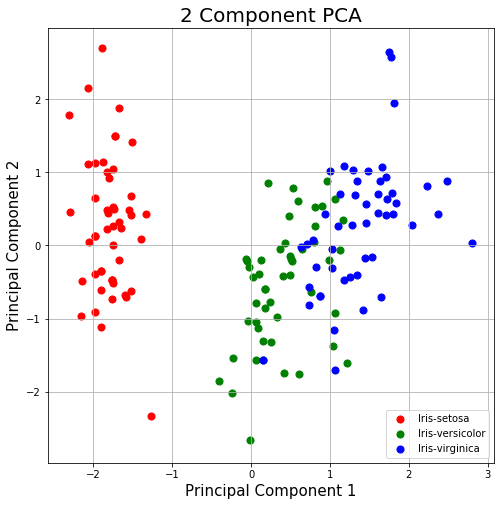

In [164]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['target'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1']
               , finalDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()